In [2]:
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt

In [3]:
sps = pd.read_csv('files/supermarket_sales.csv',parse_dates=['Date'])

In [4]:
sps.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sps.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:
sps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [7]:
sps.shape

(1000, 17)

<AxesSubplot:xlabel='Branch', ylabel='count'>

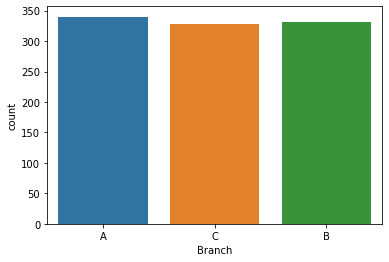

In [8]:
sns.countplot(data=sps,x='Branch')

<AxesSubplot:xlabel='City', ylabel='count'>

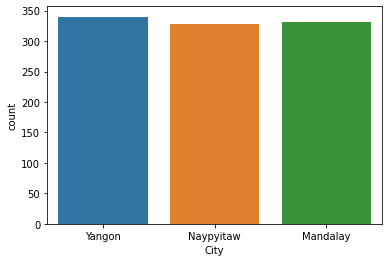

In [9]:
sns.countplot(data=sps,x='City')

<AxesSubplot:xlabel='Customer type', ylabel='count'>

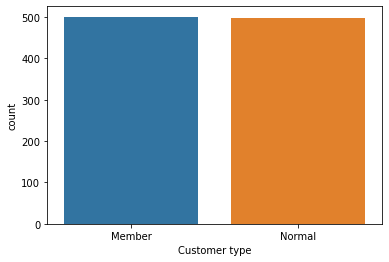

In [10]:
sns.countplot(data=sps,x='Customer type')

<AxesSubplot:xlabel='Gender', ylabel='count'>

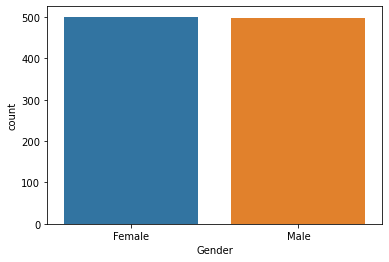

In [11]:
sns.countplot(data=sps,x='Gender')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Health and beauty'),
  Text(1, 0, 'Electronic accessories'),
  Text(2, 0, 'Home and lifestyle'),
  Text(3, 0, 'Sports and travel'),
  Text(4, 0, 'Food and beverages'),
  Text(5, 0, 'Fashion accessories')])

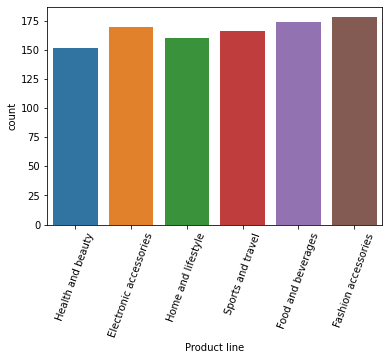

In [12]:
sns.countplot(data=sps,x='Product line')
plt.xticks(rotation=70)

<AxesSubplot:xlabel='Payment', ylabel='count'>

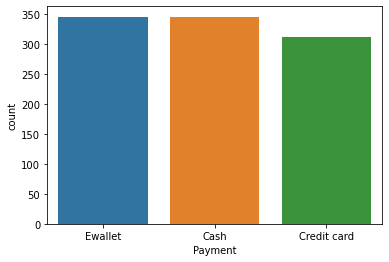

In [13]:
sns.countplot(data=sps,x='Payment')

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

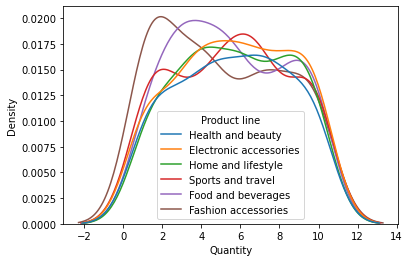

In [14]:
sns.kdeplot(data=sps, x='Quantity',hue='Product line')

<AxesSubplot:xlabel='Quantity', ylabel='Density'>

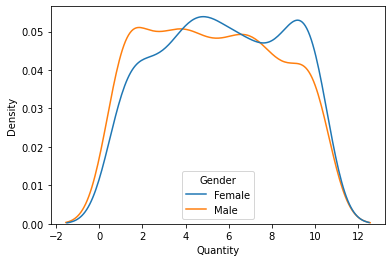

In [15]:
sns.kdeplot(data=sps, x='Quantity',hue='Gender')

<AxesSubplot:xlabel='Tax 5%'>

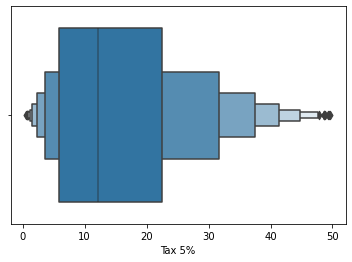

In [16]:
sns.boxenplot(data=sps, x='Tax 5%' )

In [17]:
sps['Tax 5%'].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: Tax 5%, dtype: float64

<AxesSubplot:xlabel='Rating', ylabel='Count'>

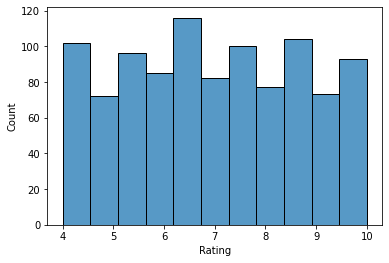

In [18]:
sns.histplot(data=sps, x='Rating')

In [22]:
sps_gbc = sps.groupby(by='City',sort=True).mean()
#sps_gbc.to_csv('supermktsales_city.csv')
sps_gbc

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
City,,,,,,,,
Mandalay,55.659277,5.481928,15.232024,319.872506,304.640482,4.761905,15.232024,6.818072
Naypyitaw,56.609024,5.582317,16.052367,337.099715,321.047348,4.761905,16.052367,7.072866
Yangon,54.780853,5.467647,14.874001,312.354031,297.480029,4.761905,14.874001,7.027059


### Naypyitaw recorded the highest sales between JAN-MARCH followed by Mandalay and lastly Yangon.

In [59]:
city_productorders = sps.groupby(by=['City','Product line'],as_index=False)['Branch'].count()
city_productorders.rename(columns={'City':'City','Product line': 'Product Line','Branch':'Orders'},inplace=True)

#city_productorders.rename({'':'Order'},axis=1)
#city_productorders.to_csv('CityProductOrders.csv')

,City,Product Line,Orders
0,Mandalay,Electronic accessories,55
1,Mandalay,Fashion accessories,62
2,Mandalay,Food and beverages,50
3,Mandalay,Health and beauty,53
4,Mandalay,Home and lifestyle,50
5,Mandalay,Sports and travel,62
6,Naypyitaw,Electronic accessories,55
7,Naypyitaw,Fashion accessories,65
8,Naypyitaw,Food and beverages,66
9,Naypyitaw,Health and beauty,52


In [ ]:
sps_gbm = sps.groupby(sps['Date'].dt.month.rename('month')).sum()
sps_gbm.sort_values(by='Total',ascending=False)

Data available is for January-March, 2019. Total sales was highest in January

In [60]:
sps.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

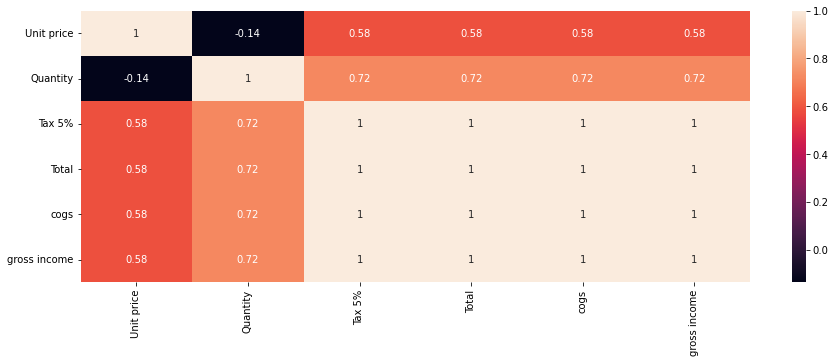

In [89]:
fig, ax = plt.subplots(1,1)
spscorr = sps.select_dtypes(include='number')
#spsdcorr = spsdcorr.drop(columns=['gross margin percentage','Rating'])
sns.heatmap(spsdcorr.corr(),annot=True)
#sns.heatmap(spscorr.corr(),annot=True)
fig.set_size_inches(15,5)